#Exploración de datos

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/Datos_monografía.xlsx', header = 0)

In [ ]:
df.columns = df.columns.str.title()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("__", "_")
df.columns = df.columns.str.replace("Ndvi", "NDVI")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Mes                           96 non-null     int64  
 1   NDVI                          96 non-null     float64
 2   Precipitación                 96 non-null     float64
 3   Evapotranspiración            96 non-null     float64
 4   Intercepción                  96 non-null     float64
 5   Evapotranspiración_Potencial  96 non-null     float64
 6   Humedad_Del_Suelo             96 non-null     float64
 7   Recarga                       96 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 6.1 KB


In [ ]:
df.describe()

,Mes,NDVI,Precipitación,Evapotranspiración,Intercepción,Evapotranspiración_Potencial,Humedad_Del_Suelo,Recarga
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,6.500000,0.718484,152.939872,107.602642,21.938173,148.237226,6775.581347,12.263074
std,3.470174,0.063083,72.459348,17.822530,10.622865,17.011936,1912.496048,19.240371
min,1.000000,0.507693,14.795760,55.873611,1.924262,69.065290,2524.892458,0.002570
25%,3.750000,0.680992,107.752661,99.362773,15.799435,139.663264,5277.845832,0.679930
50%,6.500000,0.742779,142.835718,110.129264,24.107704,147.714306,6629.215171,3.914425
75%,9.250000,0.766414,211.338201,120.669349,30.882808,158.720574,8519.760712,17.937855
max,12.000000,0.798472,364.757331,142.040391,36.480872,185.793053,9919.101253,116.139752


In [ ]:
print(df.columns)

Index(['Mes', 'NDVI', 'Precipitación', 'Evapotranspiración', 'Intercepción',
       'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga'],
      dtype='object')


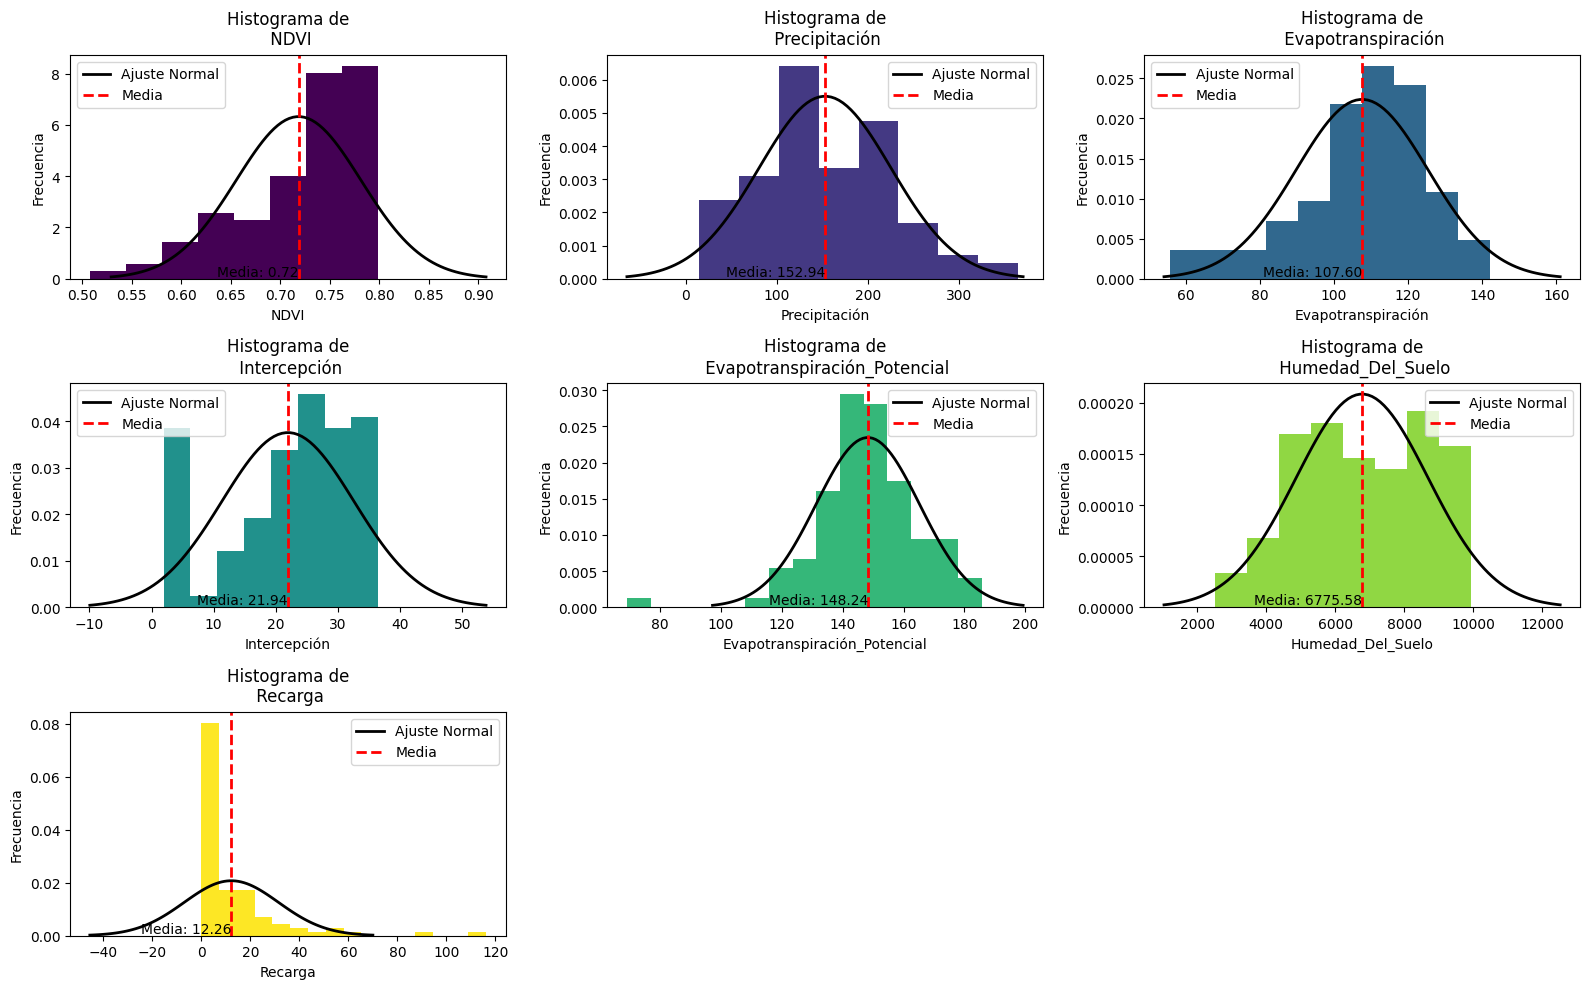

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

x = ['NDVI', 'Precipitación', 'Evapotranspiración', 'Intercepción',
     'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga']

colors = plt.cm.viridis(np.linspace(0, 1, len(x)))  # Colores diferentes para cada variable

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

for i, variable in enumerate(x):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Calcular la media y la desviación estándar de la variable
    mu, std = df[variable].mean(), df[variable].std()

    # Crear un rango de valores para la curva de mejor ajuste
    x_values = np.linspace(mu - 3 * std, mu + 3 * std, 100)

    # Calcular la curva de densidad de probabilidad (PDF) utilizando una distribución normal
    pdf = norm.pdf(x_values, mu, std)

    # Trazar el histograma
    ax.hist(df[variable], bins="auto", density=True, cumulative=False, color=colors[i])

    # Trazar la curva de mejor ajuste
    ax.plot(x_values, pdf, 'k-', lw=2, label='Ajuste Normal')

    # Agregar la línea vertical para la media
    ax.axvline(mu, color='r', linestyle='dashed', linewidth=2, label='Media')

    # Agregar el valor de la media al inicio del eje x
    ax.text(mu, 0, f'Media: {mu:.2f}', ha='right', va='bottom', color='black')

    ax.set_title(f'Histograma de\n {variable}', y=1.01)  # Ajusta el valor de y para separar el título
    ax.set_xlabel(variable)
    ax.set_ylabel('Frecuencia')
    ax.legend()

# Elimina cualquier eje no utilizado
for i in range(len(x), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


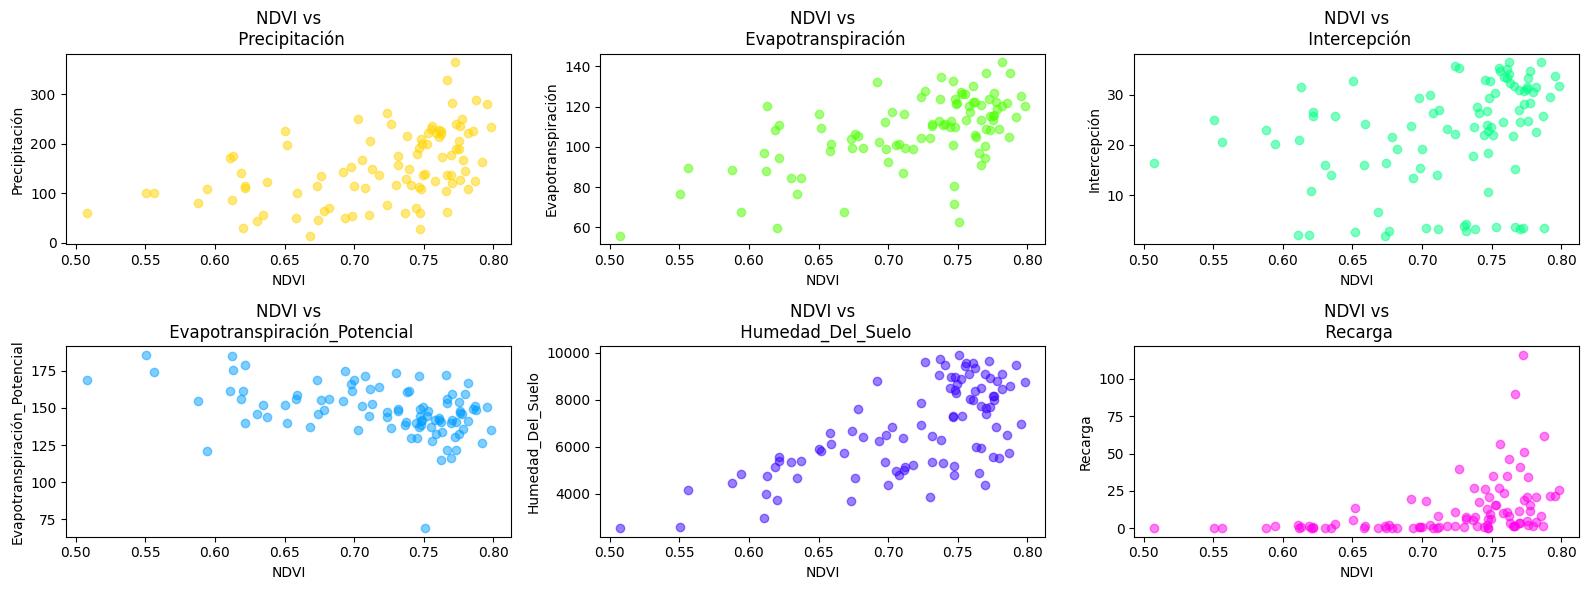

In [ ]:
import matplotlib.pyplot as plt

# Variables
x = 'NDVI'
y_variables = ['Precipitación', 'Evapotranspiración', 'Intercepción', 'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga']

# Configura el tamaño de la figura
plt.figure(figsize=(16, 6))

# Utiliza una paleta de colores
palette = sns.color_palette('hsv', len(y_variables))

# Crea subtramas para los gráficos de dispersión
for i, (y, color) in enumerate(zip(y_variables, palette), 1):
    plt.subplot(2, 3, i)
    plt.scatter(df[x], df[y], alpha=0.5, color=color)
    plt.title(f'{x} vs\n {y}')
    plt.xlabel(x)
    plt.ylabel(y)

# Ajusta el espaciado entre los gráficos
plt.tight_layout()

# Muestra los gráficos de dispersión
plt.show()


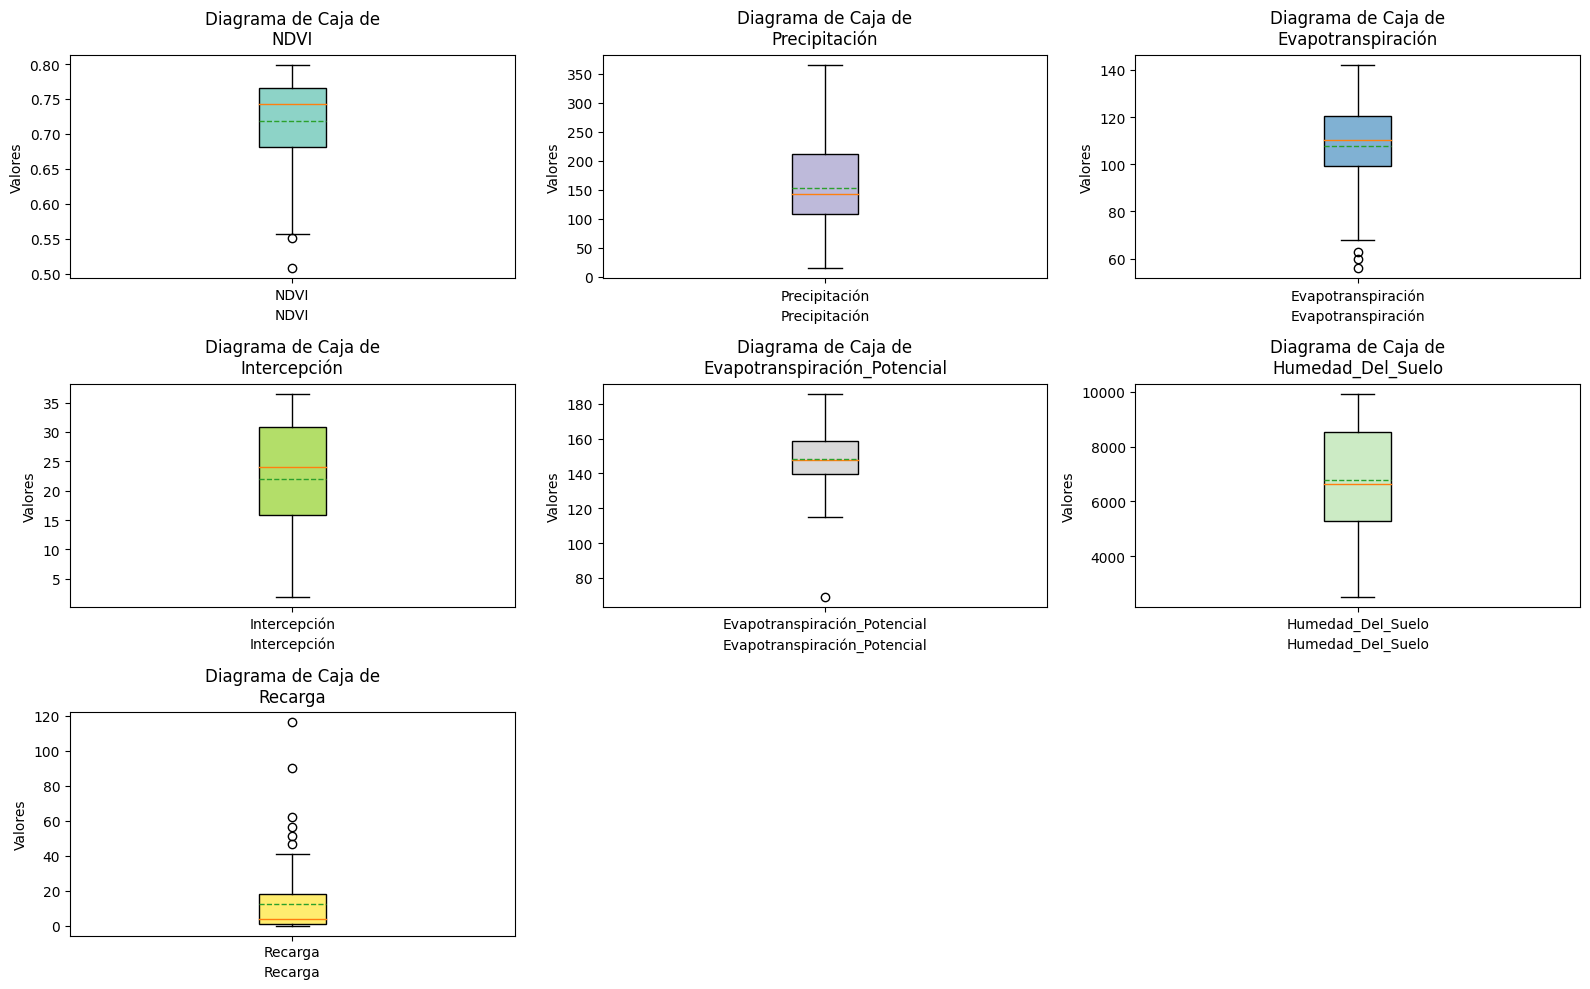

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

x = ['NDVI', 'Precipitación', 'Evapotranspiración', 'Intercepción',
     'Evapotranspiración_Potencial', 'Humedad_Del_Suelo', 'Recarga']

# Cambia a la paleta de colores "Set3"
colors = plt.cm.Set3(np.linspace(0, 1, len(x)))

fig, axes = plt.subplots(3, 3, figsize=(16, 10))

for i, variable in enumerate(x):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Crear un diagrama de caja vertical para la variable
    ax.boxplot(df[variable], vert=True, labels=[variable], showmeans=True, meanline=True, patch_artist=True,
               boxprops=dict(facecolor=colors[i], color='black'))

    ax.set_title(f'Diagrama de Caja de\n{variable}', y=1.01)  # Ajusta el valor de y para separar el título
    ax.set_xlabel(variable)
    ax.set_ylabel('Valores')

# Elimina cualquier eje no utilizado
for i in range(len(x), 3*3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

